In [17]:
from gensim import corpora, models, similarities, matutils
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [5]:
from nltk.corpus import reuters

In [6]:
print("Всего  предложений: {0}".format(len(reuters.sents())))
print("Всего слов: {0}".format(len(reuters.words())))

Всего  предложений: 54716
Всего слов: 1720901


In [8]:
# CBOW, окно=5, компнент в векторе=100
model = models.Word2Vec(reuters.sents(), size=100, window=5, min_count=5, workers=4, sg=0)

In [22]:
model.wv.similar_by_word("oil")

[('crude', 0.7607175707817078),
 ('natural', 0.7332562208175659),
 ('fuel', 0.7167024612426758),
 ('gasoline', 0.6898035407066345),
 ('gas', 0.6767829060554504),
 ('pipeline', 0.650299072265625),
 ('spot', 0.6464951038360596),
 ('exploration', 0.6295895576477051),
 ('output', 0.6224173307418823),
 ('production', 0.6211074590682983)]

In [30]:
model.wv.similar_by_word("economy")

[('economic', 0.8318949937820435),
 ('situation', 0.8128095865249634),
 ('policies', 0.8041431307792664),
 ('strength', 0.7985579371452332),
 ('growing', 0.7967620491981506),
 ('recession', 0.7940606474876404),
 ('external', 0.7934210300445557),
 ('trend', 0.7895259857177734),
 ('problem', 0.7839701175689697),
 ('policy', 0.7736639976501465)]

In [34]:
model.wv.similar_by_word("large")

[('small', 0.8687140941619873),
 ('smaller', 0.7866408228874207),
 ('risk', 0.7567628622055054),
 ('crisis', 0.7517421245574951),
 ('factors', 0.747647225856781),
 ('huge', 0.7467299699783325),
 ('major', 0.7416210770606995),
 ('growing', 0.739194393157959),
 ('partly', 0.7303204536437988),
 ('means', 0.7275477051734924)]

In [51]:
model.wv.similarity("France", "Germany")

0.697131980979977

In [52]:
model.wv.similarity("Canada", "US")

0.27754186851150475

In [48]:
model.wv.most_similar(positive=['Canada', 'France'], negative=['Japan'])

[('Hong', 0.8157498240470886),
 ('Kong', 0.7681841850280762),
 ('America', 0.7577517628669739),
 ('North', 0.7015889883041382),
 ('Australia', 0.6965367794036865),
 ('Atlantic', 0.6951233148574829),
 ('Italy', 0.6945406794548035),
 ('Virginia', 0.6932430267333984),
 ('Commonwealth', 0.6921131014823914),
 ('Columbia', 0.6887733936309814)]

In [50]:
model.wv.most_similar(positive=['London', 'Moscow', 'Germany'])

[('Tokyo', 0.7869855761528015),
 ('Argentina', 0.7810214161872864),
 ('Washington', 0.7516515851020813),
 ('Iran', 0.7436643838882446),
 ('Iraq', 0.7351721525192261),
 ('Kuwait', 0.7350636124610901),
 ('Bonn', 0.732857346534729),
 ('forces', 0.7294527292251587),
 ('businessmen', 0.727522075176239),
 ('diplomatic', 0.7274485230445862)]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


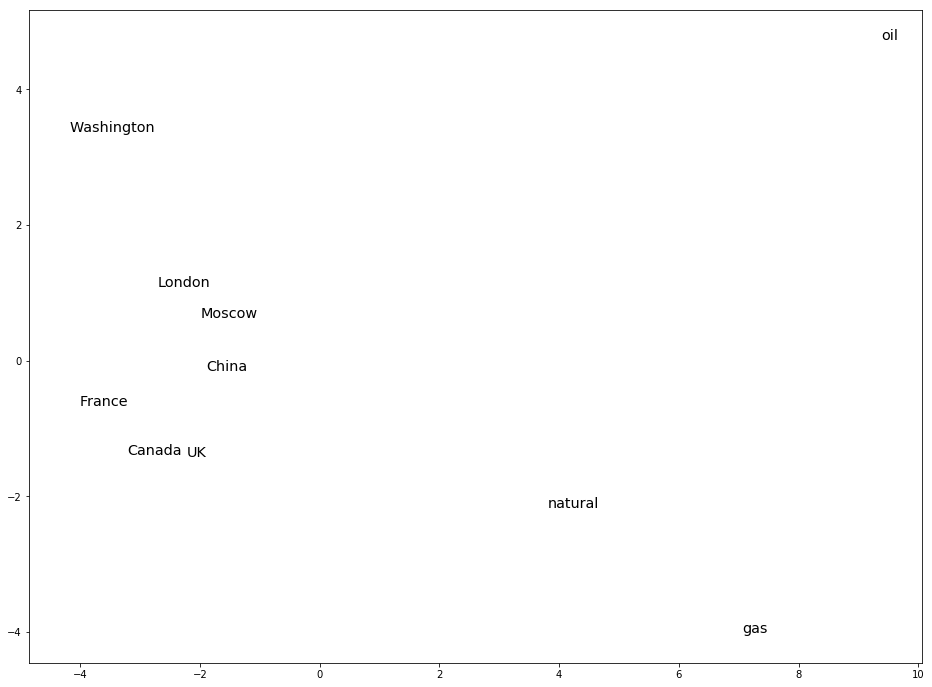

In [55]:
#***код из интернета для визуализации***

from sklearn.decomposition import PCA

words = "gas/Canada/oil/China/UK/London/Moscow/natural/France/Washington".split("/")
word_vectors = [model[word] for word in words]
# create and apply PCA transform
pca = PCA(n_components=2)
principal_components = pca.fit_transform(word_vectors)
# slice the 2D array
x = principal_components[:, 0]
y = principal_components[:, 1]
# plot with text annotation
fig, ax = plt.subplots(figsize=(16,12))
ax.scatter(x, y, s=0)
for i, label in enumerate(words):
    ax.annotate(label, (x[i], y[i]), size='x-large')

## Попробуем другой датасет - movie reviews

In [56]:
from nltk.corpus import movie_reviews
print("Всего  предложений: {0}".format(len(movie_reviews.sents())))
print("Всего слов: {0}".format(len(movie_reviews.words())))

Всего  предложений: 71532
Всего слов: 1583820


In [64]:
model_r = models.Word2Vec(movie_reviews.sents(), size=100, window=3, min_count=3, workers=4, sg=0)

In [68]:
model_r.wv.similarity("tarantino", "travolta")

0.8048583576204864

In [67]:
model_r.wv.similarity("tarantino", "theron")

0.7354959624634569

In [69]:
model_r.wv.most_similar(positive=['woman', 'king'], negative=['love'])

[('producer', 0.7433897256851196),
 ('jim', 0.7407698631286621),
 ('former', 0.738857626914978),
 ('michael', 0.7368613481521606),
 ('willis', 0.7245895266532898),
 ('william', 0.7230663895606995),
 ('captain', 0.7219621539115906),
 ('tom', 0.7216625809669495),
 ('roger', 0.7203207612037659),
 ('james', 0.7199656367301941)]

In [70]:
model_r.wv.most_similar(positive=['woman', 'king'], negative=['men'][0][0])

[('former', 0.8061609268188477),
 ('lady', 0.7689892649650574),
 ('jack', 0.7584853172302246),
 ('leader', 0.7545984387397766),
 ('mysterious', 0.7508406639099121),
 ('queen', 0.744106650352478),
 ('partner', 0.7375525236129761),
 ('army', 0.7352516651153564),
 ('willis', 0.7339324951171875),
 ('cage', 0.72403883934021)]

In [71]:
model_r.wv.similar_by_word("travolta")

[('cameron', 0.9312663078308105),
 ('miller', 0.9278277158737183),
 ('simon', 0.9211254715919495),
 ('malkovich', 0.9210548996925354),
 ('cusack', 0.9185729622840881),
 ('elizabeth', 0.91431725025177),
 ('crystal', 0.9098132848739624),
 ('stone', 0.9090636968612671),
 ('freeman', 0.9072277545928955),
 ('pitt', 0.906061053276062)]

In [76]:
model_r.wv.most_similar(positive=['diaz', 'cruz', 'pitt'], negative=['travolta'])

[('harold', 0.9698687791824341),
 ('jonny', 0.9658735394477844),
 ('del', 0.9656310677528381),
 ('marshal', 0.9653959274291992),
 ('ward', 0.9652262330055237),
 ('haley', 0.9648804664611816),
 ('katt', 0.963979959487915),
 ('kathleen', 0.963445782661438),
 ('elias', 0.963142454624176),
 ('leslie', 0.9629198312759399)]

In [77]:
model_r.wv.most_similar(positive=['tarantino'], negative=['travolta'])

[('horror', 0.6400281190872192),
 ('hollywood', 0.62734055519104),
 ('slasher', 0.6160204410552979),
 ('animated', 0.6127818822860718),
 ('history', 0.6079699397087097),
 ('genre', 0.5663665533065796),
 ('modern', 0.5583038330078125),
 ('cinematic', 0.5410255193710327),
 ('any', 0.5382308959960938),
 ('motion', 0.5362575054168701)]